In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the inventory data from CSV
file_path = '/content/drive/MyDrive/BDM Capstone/Processed Raw data/Inventory data - Sheet1.csv'
inventory_data = pd.read_csv(file_path)

In [38]:
# Display the first few rows of the data to understand its structure
print("First few rows of the inventory data:")
inventory_data.head()

First few rows of the inventory data:


,month,year,Output,Input,Variation,Expected Opening Stock,Expected Closing Stock,Actual Open Stock,Actual Closing Stock,month-year,Discrepancy Rate
0,Jun,2022,10843,10863,20,12657,12677,12657,8042,Jun-2022,36.562278
1,Jul,2022,12030,12261,231,5020,8273,8042,3267,Jul-2022,60.510093
2,Aug,2022,7444,8962,1518,8273,4785,3267,2675,Aug-2022,44.096134
3,Sep,2022,10572,13713,3141,4785,5816,2675,1568,Sep-2022,73.039890
4,Oct,2022,6258,8275,2017,5816,3585,1568,968,Oct-2022,72.998605


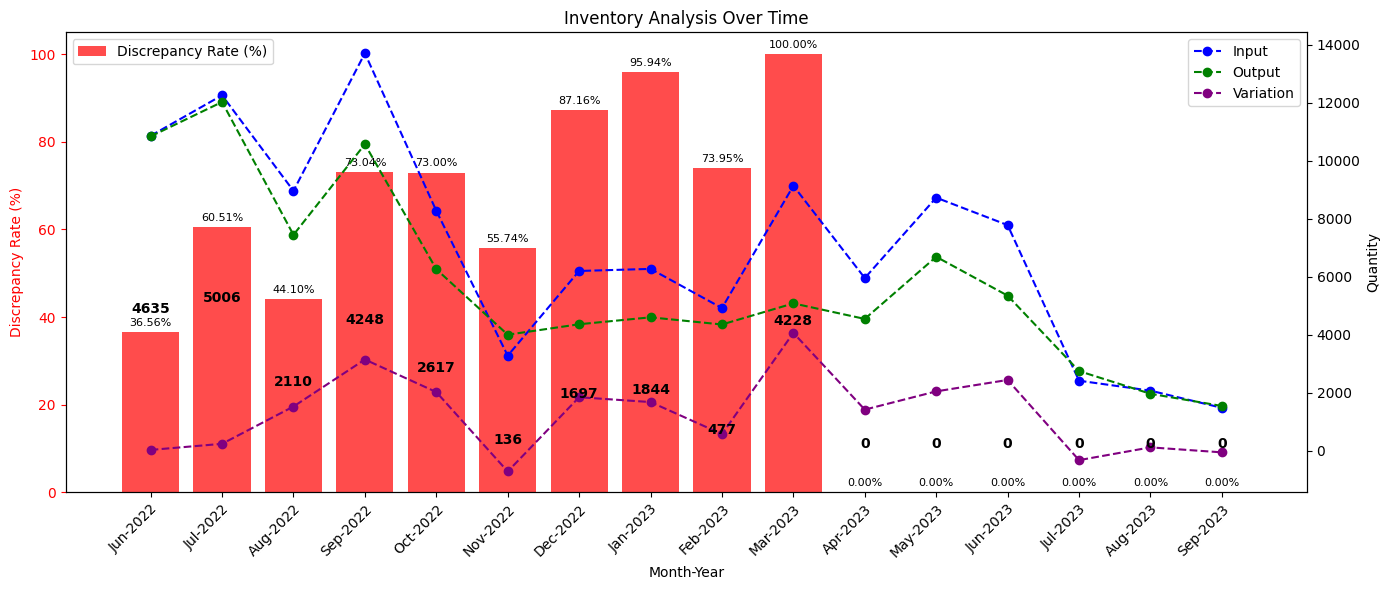

In [40]:
# Extract the first three letters of the month
inventory_data['month'] = inventory_data['month'].str[:3]

# Combine 'month' and 'year' columns into a new 'month-year' column
inventory_data['month-year'] = inventory_data['month'] + '-' + inventory_data['year'].astype(str)

# Calculate the rate of inventory discrepancy
inventory_data['Discrepancy Rate'] = (inventory_data['Expected Closing Stock'] - inventory_data['Actual Closing Stock']) / inventory_data['Expected Closing Stock'] * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plotting the Discrepancy Rate
bars = ax1.bar(inventory_data.index, inventory_data['Discrepancy Rate'], color='red', alpha=0.7, label='Discrepancy Rate (%)')
ax1.set_xlabel('Month-Year')
ax1.set_ylabel('Discrepancy Rate (%)', color='red')
ax1.tick_params('y', colors='red')

# Add labels above the bars
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', color='black', fontsize=8)

# Creating a second y-axis for Input, Output, and Variation
ax2 = ax1.twinx()
ax2.plot(inventory_data.index, inventory_data['Input'], color='blue', label='Input', linestyle='--', marker='o')
ax2.plot(inventory_data.index, inventory_data['Output'], color='green', label='Output', linestyle='--', marker='o')
ax2.plot(inventory_data.index, inventory_data['Variation'], color='purple', label='Variation', linestyle='--', marker='o')
ax2.set_ylabel('Quantity', color='black')
ax2.tick_params('y', colors='black')

# Adding legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Set x-axis ticks and labels
ax1.set_xticks(inventory_data.index)
ax1.set_xticklabels(inventory_data['month-year'], rotation=45, ha='right', rotation_mode='anchor')

# Annotate in the middle of bars with Discrepancy in Quantity
for i, disp in enumerate(inventory_data['Discrepancy Rate']):
    mid_point = int(inventory_data['Expected Closing Stock'].iloc[i] - inventory_data['Actual Closing Stock'].iloc[i])
    ax2.text(i, mid_point, f'{mid_point}', ha='center', va='bottom', color='black', fontweight='bold')

plt.title('Inventory Analysis Over Time')

plt.title('Inventory Analysis Over Time')
plt.tight_layout()
plt.show()

In [35]:
# Descriptive analysis
descriptive_stats = inventory_data[['Expected Closing Stock', 'Actual Closing Stock']].describe()
print("\nDescriptive Statistics:")
descriptive_stats.T


Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
Expected Closing Stock,16.0,4480.375,3121.817822,244.0,1940.75,4506.5,5700.5,12677.0
Actual Closing Stock,16.0,2793.000,2633.122000,0.0,229.50,2121.5,5565.0,8042.0


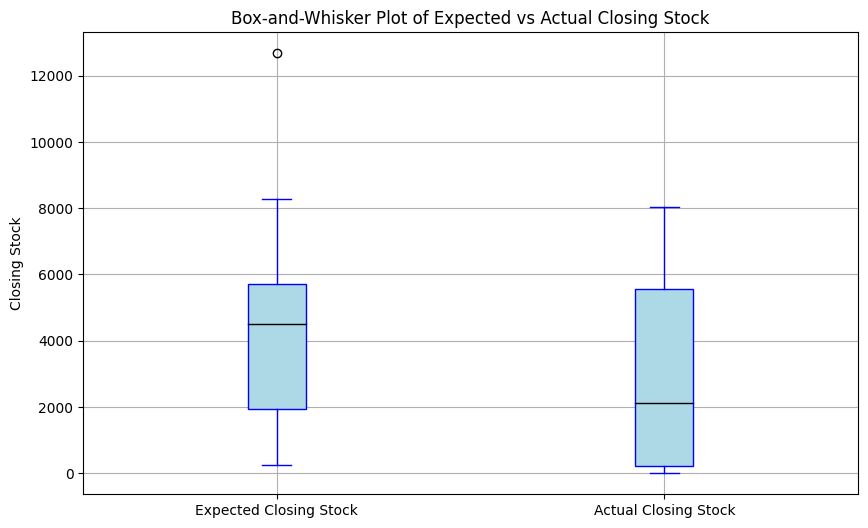

In [16]:
# Box-and-whisker plot with colors
plt.figure(figsize=(10, 6))

# Boxplot with colors
box_plot = inventory_data[['Expected Closing Stock', 'Actual Closing Stock']].boxplot(
    patch_artist=True,  # Enable patch_artist for filling with colors
    medianprops={'color': 'black'},  # Color of the median line
    boxprops={'facecolor': 'lightblue', 'edgecolor': 'blue'},  # Color of the box
    whiskerprops={'color': 'blue'},  # Color of the whiskers
    capprops={'color': 'blue'}  # Color of the caps on the whiskers
)

plt.title('Box-and-Whisker Plot of Expected vs Actual Closing Stock')
plt.ylabel('Closing Stock')

plt.show()

In [37]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U Test
_, p_value = mannwhitneyu(inventory_data['Expected Closing Stock'][:13], inventory_data['Actual Closing Stock'][:13])

# Print the p-value
print("P-value for Mann-Whitney U Test:", p_value)
# Interpret the results
alpha = 0.05  # significance level
print(f'At significance level: {alpha}')
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between Expected and Actual Closing Stock.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between Expected and Actual Closing Stock.")


P-value for Mann-Whitney U Test: 0.0482259200506939
At significance level: 0.05
Reject the null hypothesis: There is a significant difference between Expected and Actual Closing Stock.
